In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import re
import warnings

warnings.filterwarnings('ignore')

matplotlib.rcParams['font.family'] = 'Binggrae'
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
train = pd.read_csv('train.csv', index_col = 'PassengerId')
train_x = train.iloc[:,1:]
train_y = train['Survived']
test = pd.read_csv('test.csv', index_col = 'PassengerId')
df = pd.concat([train_x, test])

In [3]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB
None


## EDA - Train

In [5]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

<AxesSubplot:>

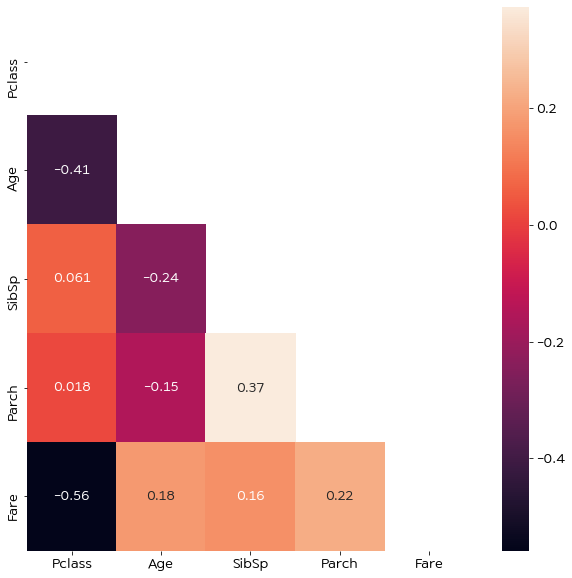

In [6]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, mask=mask)

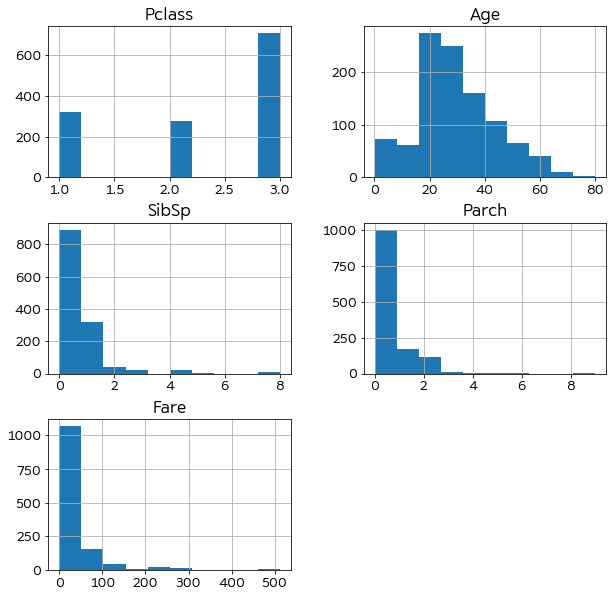

In [7]:
df[['Pclass','Age','SibSp','Parch','Fare']].hist(figsize=(10,10))
plt.show()
# Fare 이상치 제거

<AxesSubplot:>

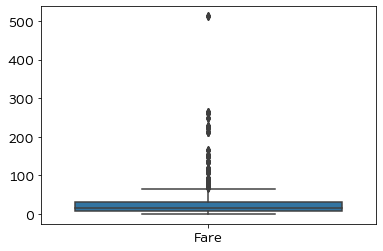

In [8]:
sns.boxplot(data =df[['Fare']])

In [9]:
IQR = df['Fare'].quantile(q=0.75) - df['Fare'].quantile(q=0.25)
outlier = df.loc[(df['Fare'] < df['Fare'].quantile(q=0.25)-1.5*IQR)|(df['Fare'] > df['Fare'].quantile(q=0.75)+1.5*IQR)]
display(outlier)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
28,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
35,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...
1289,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...",female,48.0,1,1,13567,79.2000,B41,C
1292,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S
1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C


In [10]:
df['Title']=df.Name.str.extract('([A-za-z]+)\.')
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mlle          2
Ms            2
Lady          1
Capt          1
Sir           1
Dona          1
Don           1
Countess      1
Jonkheer      1
Mme           1
Name: Title, dtype: int64

In [11]:
con1 = (df['Title']!='Mr')
con2 = (df['Title']!='Miss')
con3 = (df['Title']!='Mrs')
df.loc[con1&con2&con3,'Title'] = 'High Class'

In [12]:
con4 = (df['Title']=='Mr')
con5 = (df['Title']=='Miss')
con6 = (df['Title']=='Mrs')
df.loc[con4|con5|con6,'Title'] = 'Peoples'
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Peoples
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Peoples
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Peoples
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Peoples
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Peoples


In [13]:
df['Title'] = LabelEncoder().fit_transform(df[['Title']])
df.head()
#people = 1, HighClass = 0

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [14]:
df.drop(columns=['Cabin', 'Name','Ticket'], inplace = True)

In [15]:
df['Age'].fillna(value = int(df['Age'].mean()), inplace = True)
df['Embarked'].fillna(value = 'S', inplace = True)
df.head()
#S =2, Q =1 ,C=0, 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,1
2,1,female,38.0,1,0,71.2833,C,1
3,3,female,26.0,0,0,7.9250,S,1
4,1,female,35.0,1,0,53.1000,S,1
5,3,male,35.0,0,0,8.0500,S,1


In [16]:
df.loc[df['Fare'].isnull(),'Fare'] = df.loc[df['Pclass']==3,'Fare'].mean()

In [17]:
for i in range(1,4):
    print('Pclass',i,': ',df.loc[df['Pclass']==i,'Fare'].mean())
  

Pclass 1 :  87.5089916408668
Pclass 2 :  21.1791963898917
Pclass 3 :  13.302888700564967


In [18]:
for i in range(1,4):
    df.loc[(df['Pclass']==i)&(df['Fare']==0),'Fare'] = df.loc[df['Pclass']==i,'Fare'].mean()

In [19]:
df['Fare'] =MinMaxScaler().fit_transform(df[['Fare']])

In [20]:
df['Age'].max()

80.0

In [21]:
df['Age'] = pd.cut(df['Age'], bins=[0,16,32,48,64,80], labels=['U-16','U-32','U-48','U-64','A-64'])
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,
1,3,male,U-32,1,0,0.008012,S,1
2,1,female,U-48,1,0,0.133775,C,1
3,3,female,U-32,0,0,0.009337,S,1
4,1,female,U-48,1,0,0.098062,S,1
5,3,male,U-48,0,0,0.009583,S,1
...,...,...,...,...,...,...,...,...
1305,3,male,U-32,0,0,0.009583,S,1
1306,1,female,U-48,0,0,0.207655,C,0
1307,3,male,U-48,0,0,0.008012,S,1


In [22]:
df['Family'] = df['SibSp'] + df['Parch']
df['Family'] = MinMaxScaler().fit_transform(df[['Family']])
df.drop(columns = ['SibSp','Parch'], inplace = True)
df

,Pclass,Sex,Age,Fare,Embarked,Title,Family
PassengerId,,,,,,,
1,3,male,U-32,0.008012,S,1,0.1
2,1,female,U-48,0.133775,C,1,0.1
3,3,female,U-32,0.009337,S,1,0.0
4,1,female,U-48,0.098062,S,1,0.1
5,3,male,U-48,0.009583,S,1,0.0
...,...,...,...,...,...,...,...
1305,3,male,U-32,0.009583,S,1,0.0
1306,1,female,U-48,0.207655,C,0,0.0
1307,3,male,U-48,0.008012,S,1,0.0


In [23]:
df = pd.get_dummies(df)

## ML result

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.utils import shuffle

In [25]:
t_y = train_y[731:891]
t_x =df.iloc[731:891,1:]
t_y

PassengerId
732    0
733    0
734    0
735    0
736    0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 160, dtype: int64

In [26]:
train_x = df.iloc[:891,1:]
train_y = train_y[:891]

test_x = df.iloc[891:,1:]
test_x

,Fare,Title,Family,Sex_female,Sex_male,Age_U-16,Age_U-32,Age_U-48,Age_U-64,Age_A-64,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
892,0.009149,1,0.0,0,1,0,0,1,0,0,0,1,0
893,0.007521,1,0.1,1,0,0,0,1,0,0,0,0,1
894,0.012799,1,0.0,0,1,0,0,0,1,0,0,1,0
895,0.010786,1,0.0,0,1,0,1,0,0,0,0,0,1
896,0.017905,1,0.2,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0.009583,1,0.0,0,1,0,1,0,0,0,0,0,1
1306,0.207655,0,0.0,1,0,0,0,1,0,0,1,0,0
1307,0.008012,1,0.0,0,1,0,0,1,0,0,0,0,1


In [27]:
train_x, train_y = shuffle(train_x, train_y, random_state = 2021)

In [28]:
def train_and_test(model):
    model.fit(train_x, train_y)
    prediction = model.predict(test_x)
    accuracy = round(model.score(train_x, train_y) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction

In [29]:
log_pred = train_and_test(LogisticRegression())
# SVM
svm_pred = train_and_test(SVC())
#kNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))
# Navie Bayes
nb_pred = train_and_test(GaussianNB())

Accuracy :  80.36 %
Accuracy :  81.37 %
Accuracy :  85.75 %
Accuracy :  94.28 %
Accuracy :  78.9 %


In [30]:
model  =  RandomForestClassifier(n_estimators=100)
model.fit(t_x,t_y)
pred=model.predict(t_x)
print(classification_report(t_y,pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       104
           1       1.00      0.89      0.94        56

    accuracy                           0.96       160
   macro avg       0.97      0.95      0.96       160
weighted avg       0.96      0.96      0.96       160



In [31]:
test.reset_index(inplace = True)

In [32]:
submission = pd.DataFrame({"PassengerId": test['PassengerId'],"Survived": rf_pred})
submission.to_csv('submission_rf.csv', index=False)